In [12]:
from helpers import loadLbmaAmPMFixes
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

plt.style.use("dark_background")


In [13]:

combined_df = loadLbmaAmPMFixes('gold')
print("Combined DataFrame:")
display(combined_df)

Combined DataFrame:


,am_fix,pm_fix
date,,
1968-04-01,38.00,37.70
1968-04-02,37.60,37.30
1968-04-03,37.70,37.60
1968-04-04,36.70,36.95
1968-04-05,37.20,37.00
...,...,...
2025-09-30,3806.55,3825.30
2025-10-01,3886.10,3872.00
2025-10-02,3877.50,3878.10


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def chartLbmaData(df: pd.DataFrame, metalName: str):
    df = df.copy()
    df['Overnight Change'] = df['am_fix'] / df['pm_fix'].shift(1) - 1
    df['Intraday Change'] = df['pm_fix'] / df['am_fix'] - 1
    df['AM Change'] = df['am_fix'].pct_change()

    df.dropna(inplace=True)

    df['Overnight Index'] = 100 * (1 + df['Overnight Change']).cumprod()
    df['Intraday Index'] = 100 * (1 + df['Intraday Change']).cumprod()
    df['AM Index'] = (df['am_fix'] / df['am_fix'].iloc[0]) * 100

    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True, height_ratios=[3, 1.2])

    price_ax = axes[0]
    price_ax.plot(df.index, df['Overnight Index'], label='Overnight Index', color='blue')
    price_ax.plot(df.index, df['Intraday Index'], label='Intraday Index', color='white')
    price_ax.plot(df.index, df['AM Index'], label='AM Fix Index', color='red')
    price_ax.set_yscale('log')
    price_ax.set_ylabel('Index Value')
    price_ax.set_title(f'{metalName} Price Indices Comparison')
    price_ax.legend()
    price_ax.grid(True, which="both", ls="--", linewidth=0.5)
    price_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))

    change_ax = axes[1]
    change_ax.plot(df.index, df['Overnight Change'], label='Overnight Change', color='blue', alpha=0.7)
    change_ax.plot(df.index, df['Intraday Change'], label='Intraday Change', color='white', alpha=0.7)
    change_ax.plot(df.index, df['AM Change'], label='AM Fix Change', color='red', alpha=0.7)
    change_ax.axhline(0, color='gray', linewidth=0.8, linestyle='--', alpha=0.6)
    change_ax.set_ylabel('Daily Change')
    change_ax.set_xlabel('Date')
    change_ax.set_title(f'{metalName} Daily Percentage Change by Session')
    change_ax.legend(loc='upper left')
    change_ax.grid(True, ls='--', linewidth=0.5, alpha=0.7)
    change_ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    fig.tight_layout()
    plt.show()

    def calculate_cagr(end_value, start_value, periods):
        return (end_value / start_value) ** (1 / periods) - 1

    total_days = (df.index[-1] - df.index[0]).days
    periods = total_days / 365.25

    cagr_overnight = calculate_cagr(df['Overnight Index'].iloc[-1], df['Overnight Index'].iloc[0], periods)
    cagr_intraday = calculate_cagr(df['Intraday Index'].iloc[-1], df['Intraday Index'].iloc[0], periods)
    cagr_am = calculate_cagr(df['AM Index'].iloc[-1], df['AM Index'].iloc[0], periods)

    vol_overnight = df['Overnight Change'].std() * np.sqrt(252)
    vol_intraday = df['Intraday Change'].std() * np.sqrt(252)
    vol_am = df['AM Change'].std() * np.sqrt(252)

    print()
    print("CAGR:")
    print(f"Overnight Index: {cagr_overnight:.2%}")
    print(f"Intraday Index: {cagr_intraday:.2%}")
    print(f"AM Fix Index: {cagr_am:.2%}")
    print()
    print("Annualized Volatility:")
    print(f"Overnight Index: {vol_overnight:.2%}")
    print(f"Intraday Index: {vol_intraday:.2%}")
    print(f"AM Fix Index: {vol_am:.2%}")
    print("Overnight:", df['Overnight Index'].iloc[-1])
    print("Intraday:", df['Intraday Index'].iloc[-1])
    print("Hold:", df['AM Index'].iloc[-1])


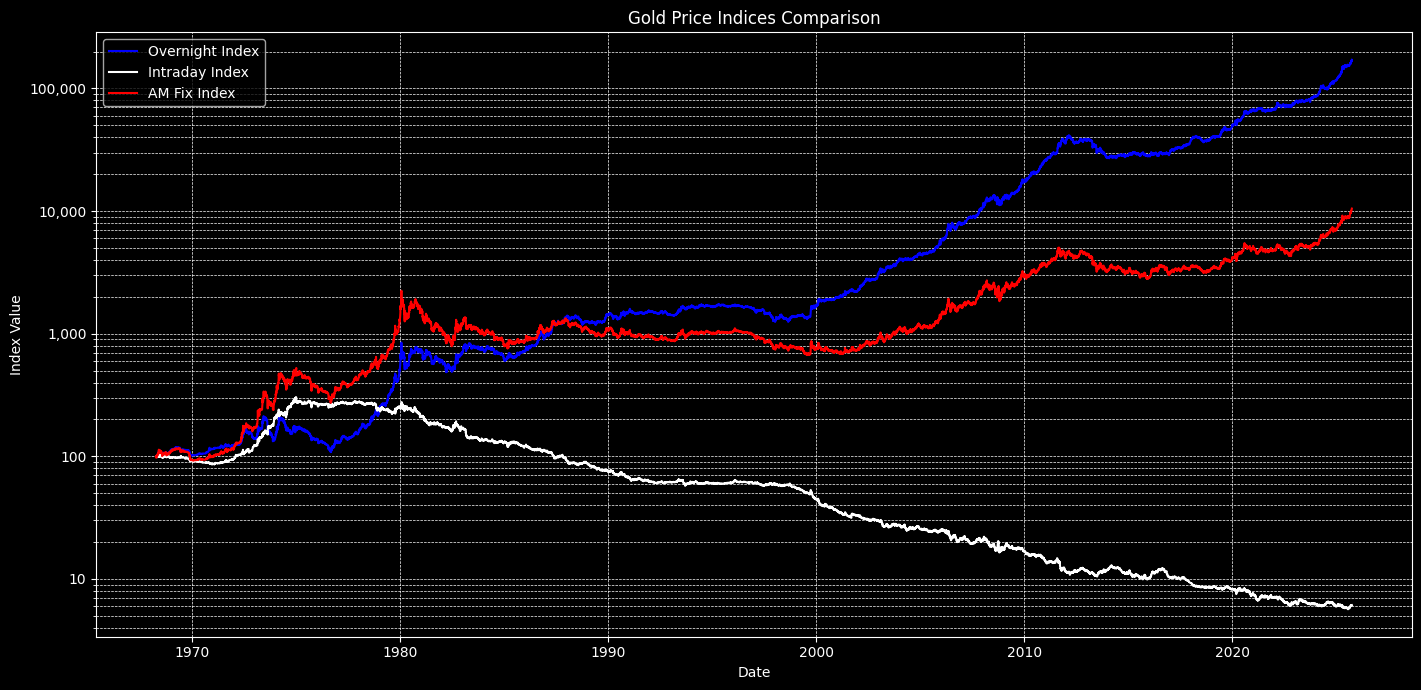


CAGR:
Overnight Index: 13.83%
Intraday Index: -4.73%
AM Fix Index: 8.43%

Annualized Volatility:
Overnight Index: 15.88%
Intraday Index: 9.97%
AM Fix Index: 19.52%
Overnight: 171305.59098777402
Intraday: 6.115383995673406
Hold: 10483.909574468085


In [15]:
# GOLD
chartLbmaData(loadLbmaAmPMFixes('gold'), 'Gold')

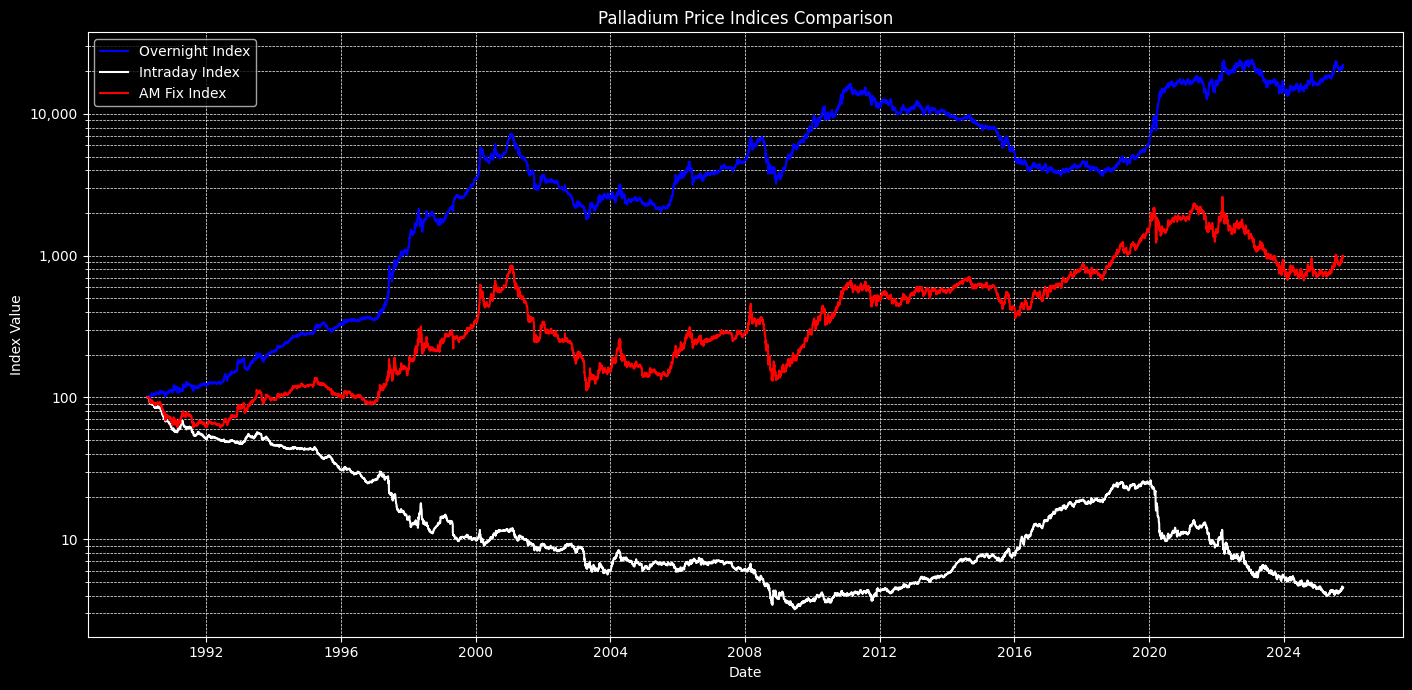


CAGR:
Overnight Index: 16.41%
Intraday Index: -8.34%
AM Fix Index: 6.67%

Annualized Volatility:
Overnight Index: 26.87%
Intraday Index: 18.14%
AM Fix Index: 33.21%
Overnight: 22150.9200520435
Intraday: 4.548082980149455
Hold: 990.2610050642775


In [16]:
# PALLADIUM
chartLbmaData(loadLbmaAmPMFixes('palladium'), 'Palladium')

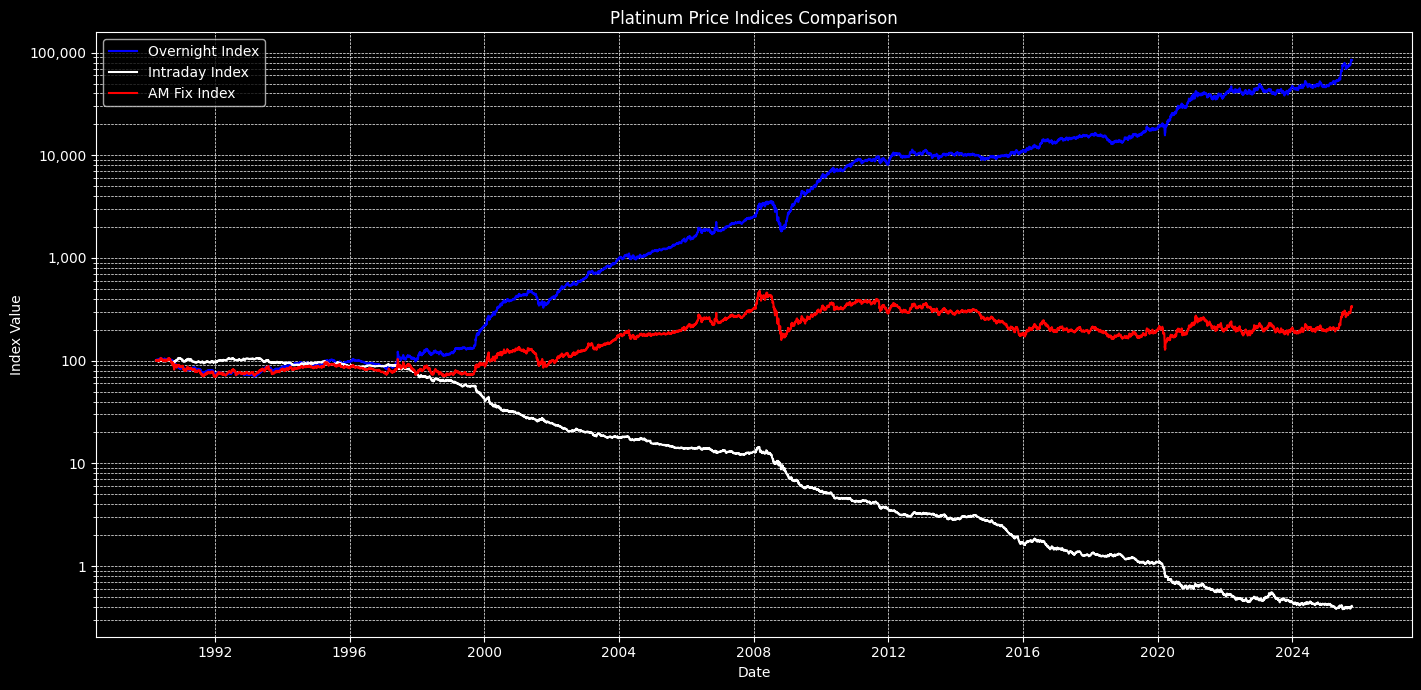


CAGR:
Overnight Index: 20.86%
Intraday Index: -14.36%
AM Fix Index: 3.50%

Annualized Volatility:
Overnight Index: 19.50%
Intraday Index: 10.90%
AM Fix Index: 22.76%
Overnight: 84393.87579316935
Intraday: 0.4079852427013204
Hold: 338.7978142076503


In [17]:
# PLATINUM

chartLbmaData(loadLbmaAmPMFixes('platinum'), 'Platinum')